<a href="https://colab.research.google.com/github/Guhan2348519/dl-lab-tasks/blob/main/2348519_DL_lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score,f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageFilter
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import VGG16, VGG19
from keras import optimizers

In [ ]:
train_dir = 'train'
test_dir = 'test'

img_width, img_height = 224, 224

In [ ]:
def load_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            if filename.endswith(".jpg"):
                img = cv2.imread(os.path.join(label_dir, filename))
                img = cv2.resize(img, (img_width, img_height))
                images.append(img)
                if label == 'benign':
                    labels.append(0)
                else:
                    labels.append(1)
    return images, labels

train_images, train_labels = load_images(train_dir)
test_images, test_labels = load_images(test_dir)

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)


train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator
train_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range=43,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    'Train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)
# Testing data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'Test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


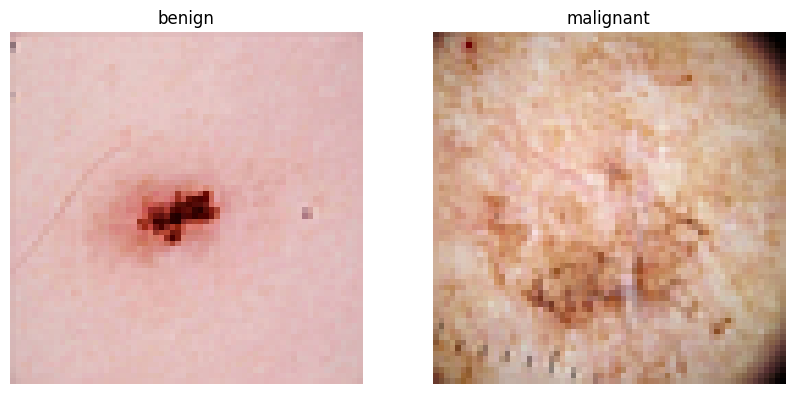

In [ ]:
# Define the directory paths for the training and testing sets
training_dir = 'Train'
testing_dir = 'Test'

# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Function to display one resized and sharpened image of each class in a given directory in a horizontal layout
def display_one_resized_sharpened_image_per_class_horizontal(directory, class_labels, target_size=(64, 64)):
    fig, axes = plt.subplots(1, len(class_labels), figsize=(10, 10))

    for i, label in enumerate(class_labels):
        class_path = os.path.join(directory, label)
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        img_path = os.path.join(class_path, images[0])  # Select the first image for each class

        img = Image.open(img_path)
        img = img.resize(target_size)


        # Apply a sharpening filter
        img = img.filter(ImageFilter.SHARPEN)

        axes[i].imshow(img)
        axes[i].set_title(label)
        axes[i].axis('off')

    plt.show()
# Display one resized and sharpened image for each class in the testing set in a horizontal layout
display_one_resized_sharpened_image_per_class_horizontal(testing_dir, class_labels)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),

    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load and augment the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,

    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'Test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)


C:\Users\Guhan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/20


C:\Users\Guhan\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 36s 363ms/step - accuracy: 0.6237 - loss: 0.6241 - val_accuracy: 0.7667 - val_loss: 0.4484
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.7498 - loss: 0.4979 - val_accuracy: 0.7848 - val_loss: 0.4161
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 19s 222ms/step - accuracy: 0.7713 - loss: 0.4630 - val_accuracy: 0.7727 - val_loss: 0.4403
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.7853 - loss: 0.4434 - val_accuracy: 0.7439 - val_loss: 0.4646
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step - accuracy: 0.7881 - loss: 0.4187 - val_accuracy: 0.7485 - val_loss: 0.4274
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step - accuracy: 0.7821 - loss: 0.4184 - val_accuracy: 0.8045 - val_loss: 0.3916
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 189ms/step - accuracy: 0.7987 - loss: 0.4149 - val_accuracy: 0.7424 - val_loss: 0.4567
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 237ms/step - accuracy: 0.7508 - loss: 0.4654 - val_accuracy: 0.781

In [ ]:
import cv2
import numpy as np

# Read and preprocess your image
img = cv2.imread('single_prediction/image1.jpg')
img = cv2.resize(img, (64, 64))

# Display the image
cv2.imshow('Image', img)


img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

preds = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(preds)

# Mapping predicted index to class label
class_indices = train_generator.class_indices
predicted_class_label = list(class_indices.keys())[predicted_class_index]

print("Predicted class:", predicted_class_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Predicted class: malignant


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 67s 710ms/step - accuracy: 0.6968 - loss: 0.6331 - val_accuracy: 0.8136 - val_loss: 0.4138
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 63s 745ms/step - accuracy: 0.8048 - loss: 0.4050 - val_accuracy: 0.8015 - val_loss: 0.4034
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 63s 741ms/step - accuracy: 0.8193 - loss: 0.3982 - val_accuracy: 0.8061 - val_loss: 0.3874
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 700ms/step - accuracy: 0.8189 - loss: 0.3716 - val_accuracy: 0.8258 - val_loss: 0.3985
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 698ms/step - accuracy: 0.8264 - loss: 0.3790 - val_accuracy: 0.8212 - val_loss: 0.3685
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 60s 700ms/step - accuracy: 0.8282 - loss: 0.3448 - val_accuracy: 0.8288 - val_loss: 0.3777
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 700ms/step - accuracy: 0.8420 - loss: 0.3431 - val_accuracy: 0.8242 - val_loss: 0.4023
Epoch 8/20
83/

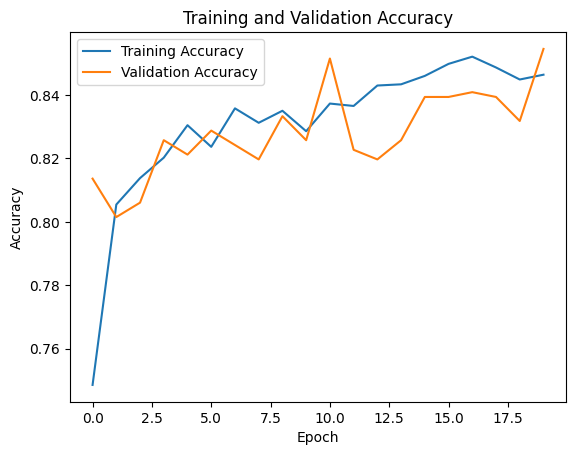

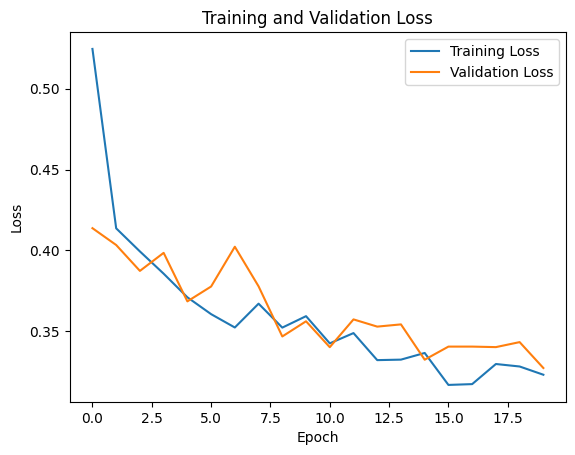

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16  # Import VGG16 model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained VGG-16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding a fully connected layer on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Apply data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and test data
train_generator = train_datagen.flow_from_directory(
    'Train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'Test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)


import matplotlib.pyplot as plt

# Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 60s 706ms/step - accuracy: 0.6341 - loss: 0.7447 - val_accuracy: 0.8121 - val_loss: 0.4395
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 61s 724ms/step - accuracy: 0.7867 - loss: 0.4540 - val_accuracy: 0.8182 - val_loss: 0.4040
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 705ms/step - accuracy: 0.8118 - loss: 0.4027 - val_accuracy: 0.8212 - val_loss: 0.3985
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 710ms/step - accuracy: 0.8101 - loss: 0.4116 - val_accuracy: 0.8182 - val_loss: 0.4003
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 60s 721ms/step - accuracy: 0.7982 - loss: 0.4381 - val_accuracy: 0.8379 - val_loss: 0.3852
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 61s 728ms/step - accuracy: 0.8203 - loss: 0.3715 - val_accuracy: 0.8333 - val_loss: 0.3621
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 62s 735ms/step - accuracy: 0.8198 - loss: 0.3811 - val_accuracy: 0.8045 - val_loss: 0.4041
Epoch 8/10
83/

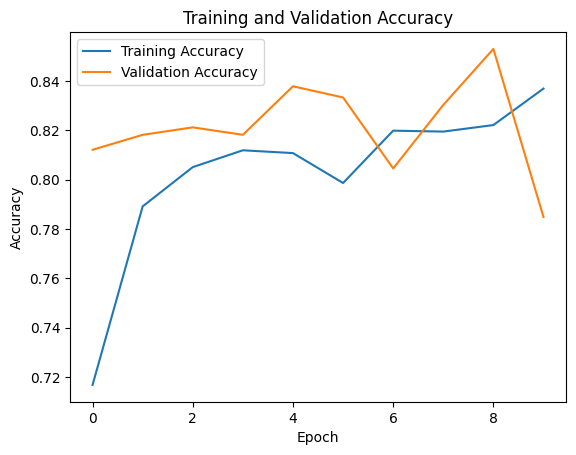

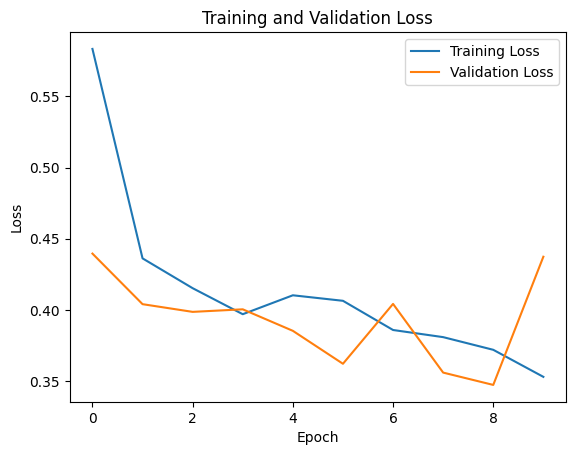

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG19

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding a fully connected layer on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Apply data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and test data
train_generator = train_datagen.flow_from_directory(
    'Train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'Test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)


import matplotlib.pyplot as plt

# Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
